In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pfinal/fianl2_trainy.csv
/kaggle/input/pfinal/final1_trainX.csv
/kaggle/input/pfinal/final3_test.csv


In [4]:
X = pd.read_csv("/kaggle/input/pfinal/final1_trainX.csv")
y = pd.read_csv("/kaggle/input/pfinal/fianl2_trainy.csv")
test = pd.read_csv("/kaggle/input/pfinal/final3_test.csv")

In [5]:
X = X.drop(['Unnamed: 0','matchType'], axis=1)
y = y.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0','matchType'], axis=1)

# SPLITTING THE DATA

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=50)

# **SCALING THE DATA********

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
test_scaled=scaler.transform(test)

# MODEL 1

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [9]:
model = Sequential()
model.add(Dense(128,input_dim=13,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear')) #output layer
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


2022-12-09 04:44:47.816204: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# FITTING THE MODEL 1

In [10]:
history = model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=5)

2022-12-09 04:44:58.882233: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
55954/55954 [==============================] - 102s 2ms/step - loss: 0.0083 - mae: 0.0673 - val_loss: 0.0077 - val_mae: 0.0653
Epoch 2/5
55954/55954 [==============================] - 94s 2ms/step - loss: 0.0077 - mae: 0.0654 - val_loss: 0.0076 - val_mae: 0.0647
Epoch 3/5
55954/55954 [==============================] - 94s 2ms/step - loss: 0.0077 - mae: 0.0652 - val_loss: 0.0075 - val_mae: 0.0647
Epoch 4/5
55954/55954 [==============================] - 93s 2ms/step - loss: 0.0077 - mae: 0.0650 - val_loss: 0.0076 - val_mae: 0.0654
Epoch 5/5
55954/55954 [==============================] - 91s 2ms/step - loss: 0.0076 - mae: 0.0649 - val_loss: 0.0076 - val_mae: 0.0651


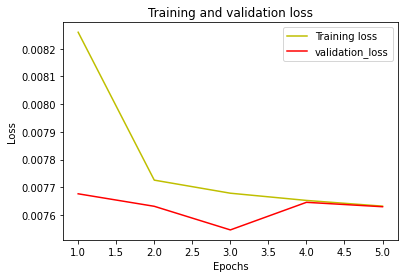

In [12]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation_loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# MSE CHECK

In [13]:
from sklearn.metrics import mean_squared_error
# prediction
y_pred = model.predict(X_test_scaled)

# accuracy check
mean_squared_error(y_test, y_pred)

0.0076826528121335565

In [15]:
retest = pd.read_csv("/kaggle/input/dataset/test_up.csv")

In [ ]:
pred=model.predict(test_scaled)
pred = pd.DataFrame(pred,columns=['winPlacePerc'])
sub = pd.concat([retest.Id,pred],axis=1)
sub.set_index('Id',inplace=True)
sub.to_csv(f"NN.csv")

# MODEL 2

In [17]:
model = Sequential()
model.add(Dense(64,input_dim=13,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear')) #output layer
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=5)

Epoch 1/5
55954/55954 [==============================] - 87s 2ms/step - loss: 0.0082 - mae: 0.0673 - val_loss: 0.0077 - val_mae: 0.0651
Epoch 2/5
55954/55954 [==============================] - 85s 2ms/step - loss: 0.0077 - mae: 0.0654 - val_loss: 0.0076 - val_mae: 0.0648
Epoch 3/5
55954/55954 [==============================] - 82s 1ms/step - loss: 0.0077 - mae: 0.0651 - val_loss: 0.0077 - val_mae: 0.0651
Epoch 4/5
55954/55954 [==============================] - 83s 1ms/step - loss: 0.0076 - mae: 0.0650 - val_loss: 0.0077 - val_mae: 0.0649
Epoch 5/5
55954/55954 [==============================] - 84s 1ms/step - loss: 0.0076 - mae: 0.0649 - val_loss: 0.0077 - val_mae: 0.0657


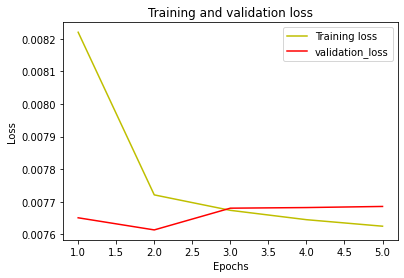

In [19]:
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation_loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
# prediction
y_pred = model.predict(X_test_scaled)

# accuracy check
mean_squared_error(y_test, y_pred)

0.007731872309290638

In [ ]:
pred=model.predict(test_scaled)
pred = pd.DataFrame(pred,columns=['winPlacePerc'])
sub = pd.concat([retest.Id,pred],axis=1)
sub.set_index('Id',inplace=True)
sub.to_csv(f"NN1.csv")

# MODEL 3

In [21]:
model = Sequential()
model.add(Dense(64,input_dim=13,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear')) #output layer
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=5)

Epoch 1/5
55954/55954 [==============================] - 103s 2ms/step - loss: 0.0083 - mae: 0.0674 - val_loss: 0.0077 - val_mae: 0.0654
Epoch 2/5
55954/55954 [==============================] - 101s 2ms/step - loss: 0.0077 - mae: 0.0653 - val_loss: 0.0076 - val_mae: 0.0645
Epoch 3/5
55954/55954 [==============================] - 102s 2ms/step - loss: 0.0077 - mae: 0.0651 - val_loss: 0.0079 - val_mae: 0.0666
Epoch 4/5
55954/55954 [==============================] - 102s 2ms/step - loss: 0.0076 - mae: 0.0649 - val_loss: 0.0077 - val_mae: 0.0647
Epoch 5/5
55954/55954 [==============================] - 101s 2ms/step - loss: 0.0076 - mae: 0.0648 - val_loss: 0.0076 - val_mae: 0.0644


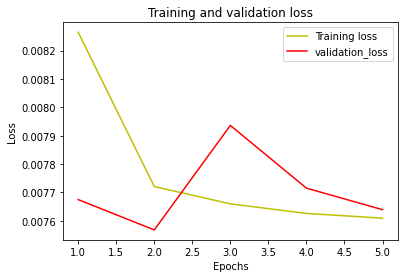

In [23]:
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation_loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
# prediction
y_pred = model.predict(X_test_scaled)

# accuracy check
mean_squared_error(y_test, y_pred)

0.007695763036203119

# MODEL 4

In [25]:
model = Sequential()
model.add(Dense(32,input_dim=13,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear')) #output layer
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=5)

Epoch 1/5
55954/55954 [==============================] - 76s 1ms/step - loss: 0.0084 - mae: 0.0679 - val_loss: 0.0078 - val_mae: 0.0659
Epoch 2/5
55954/55954 [==============================] - 75s 1ms/step - loss: 0.0077 - mae: 0.0655 - val_loss: 0.0076 - val_mae: 0.0647
Epoch 3/5
55954/55954 [==============================] - 75s 1ms/step - loss: 0.0077 - mae: 0.0651 - val_loss: 0.0075 - val_mae: 0.0643
Epoch 4/5
55954/55954 [==============================] - 74s 1ms/step - loss: 0.0076 - mae: 0.0650 - val_loss: 0.0075 - val_mae: 0.0644
Epoch 5/5
55954/55954 [==============================] - 73s 1ms/step - loss: 0.0076 - mae: 0.0650 - val_loss: 0.0079 - val_mae: 0.0662


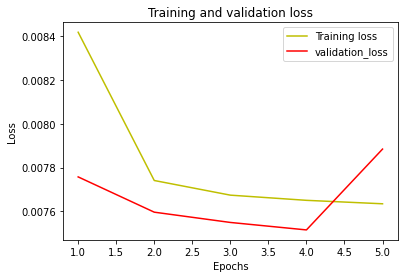

In [27]:
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation_loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
# prediction
y_pred = model.predict(X_test_scaled)

# accuracy check
mean_squared_error(y_test, y_pred)

0.007933698298475752

# MODEL 5

In [29]:
model = Sequential()
model.add(Dense(64,input_dim=13,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear')) #output layer
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 4,577
Trainable params: 4,577
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=5)

Epoch 1/5
55954/55954 [==============================] - 112s 2ms/step - loss: 0.0082 - mae: 0.0672 - val_loss: 0.0076 - val_mae: 0.0647
Epoch 2/5
55954/55954 [==============================] - 112s 2ms/step - loss: 0.0077 - mae: 0.0654 - val_loss: 0.0075 - val_mae: 0.0644
Epoch 3/5
55954/55954 [==============================] - 117s 2ms/step - loss: 0.0077 - mae: 0.0651 - val_loss: 0.0078 - val_mae: 0.0668
Epoch 4/5
55954/55954 [==============================] - 112s 2ms/step - loss: 0.0076 - mae: 0.0649 - val_loss: 0.0077 - val_mae: 0.0656
Epoch 5/5
55954/55954 [==============================] - 111s 2ms/step - loss: 0.0076 - mae: 0.0648 - val_loss: 0.0077 - val_mae: 0.0651


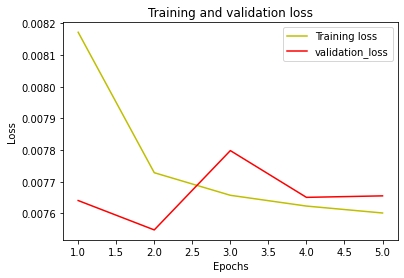

In [31]:
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation_loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
# prediction
y_pred = model.predict(X_test_scaled)

# accuracy check
mean_squared_error(y_test, y_pred)

0.00771363919309452

# MODEL 6

In [33]:
model = Sequential()
model.add(Dense(128,input_dim=13,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear')) #output layer
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 17        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=5)

Epoch 1/5
55954/55954 [==============================] - 114s 2ms/step - loss: 0.0081 - mae: 0.0670 - val_loss: 0.0078 - val_mae: 0.0657
Epoch 2/5
55954/55954 [==============================] - 114s 2ms/step - loss: 0.0077 - mae: 0.0653 - val_loss: 0.0076 - val_mae: 0.0653
Epoch 3/5
55954/55954 [==============================] - 116s 2ms/step - loss: 0.0076 - mae: 0.0650 - val_loss: 0.0076 - val_mae: 0.0649
Epoch 4/5
55954/55954 [==============================] - 116s 2ms/step - loss: 0.0076 - mae: 0.0648 - val_loss: 0.0076 - val_mae: 0.0641
Epoch 5/5
55954/55954 [==============================] - 115s 2ms/step - loss: 0.0076 - mae: 0.0647 - val_loss: 0.0076 - val_mae: 0.0654


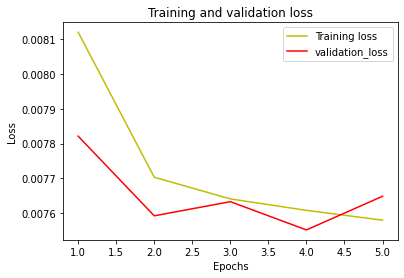

In [35]:
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation_loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
# prediction
y_pred = model.predict(X_test_scaled)

# accuracy check
mean_squared_error(y_test, y_pred)

0.0076974166497992096